In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LinearRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import keras
import kerastuner as kt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
import tensorflow as tf
from keras.initializers import RandomUniform
from keras.initializers import GlorotNormal
from keras.optimizers import Adam
from keras.layers import  Dropout
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model 
from keras.models import load_model


C:\Users\barrc\AppData\Local\Temp\ipykernel_25948\4192407790.py:17: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [2]:
df=pd.read_csv("concrete_data-1.csv", sep=",")

colnames=df.columns

df=df.to_numpy()

scaler = MinMaxScaler()
model_sc=scaler.fit(df)
df=model_sc.transform(df)

nrow=df.shape[0]
ncol=df.shape[1]

idx=list(range(0,nrow))

np.random.seed(seed=2343)
np.random.shuffle(idx)

df=df[idx,]

X=df[:,:-1]
y=df[:,-1]
df.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.175, random_state=42)
ncol=X_train.shape[1]


In [5]:
def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - (SS_res/SS_tot))

def modelreg(n_feature,n_neuron):
  initializer = RandomUniform(seed=812)
  model = Sequential()
  model.add(Dense(n_neuron, input_shape=(n_feature,),kernel_initializer=initializer ,activation='relu'))
  model.add(Dense(n_neuron, activation='relu',kernel_initializer=initializer))
  model.add(Dense(n_neuron, activation='relu',kernel_initializer=initializer))
  model.add(Dense(1,  activation='linear',kernel_initializer=initializer))
  model.compile(loss='mean_squared_error', optimizer='adam' ,metrics=['mean_absolute_percentage_error','mae',coeff_determination])
  return model

def summary_regress(actual, predicted):
    a=mean_absolute_error(actual, predicted)
    b=mean_squared_error(actual, predicted)
    c= mean_squared_error(actual, predicted)**(1/2)
    d=r2_score(actual, predicted)
    return round(a,2),round(b,2),round(c,2),round(d,2)

def summary_train_val_test(y_train_obs, y_train_pred,y_val_obs, y_val_pred,y_test_obs, y_test_pred):
  train=summary_regress(y_train_obs,y_train_pred)
  val=summary_regress(y_val_obs,y_val_pred)
  test=summary_regress(y_test_obs,y_test_pred)
  df=pd.DataFrame([train,val,test],index=["Train","Val","Test"],columns=["MAE","MSE","RMSE","R2"])
  return df

In [3]:
# Descripción de la arquitectura del modelo
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    return model

In [12]:
# Justificación con datos experimentales
# Entrenar el modelo
model = build_model()
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', coeff_determination])
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Visualizar la evolución del rendimiento del modelo
plt.figure(figsize=(12, 6))

Epoch 1/50
23/23 [==============================] - 1s 7ms/step - loss: 0.1103 - mae: 0.2613 - coeff_determination: -1.6907 - val_loss: 0.0455 - val_mae: 0.1748 - val_coeff_determination: -0.0996
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 0.0383 - mae: 0.1595 - coeff_determination: 0.0675 - val_loss: 0.0274 - val_mae: 0.1386 - val_coeff_determination: 0.3594
Epoch 3/50
23/23 [==============================] - 0s 2ms/step - loss: 0.0270 - mae: 0.1344 - coeff_determination: 0.3608 - val_loss: 0.0212 - val_mae: 0.1235 - val_coeff_determination: 0.4882
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 0.0209 - mae: 0.1189 - coeff_determination: 0.4779 - val_loss: 0.0165 - val_mae: 0.1091 - val_coeff_determination: 0.5938
Epoch 5/50
23/23 [==============================] - 0s 2ms/step - loss: 0.0180 - mae: 0.1102 - coeff_determination: 0.5637 - val_loss: 0.0145 - val_mae: 0.1004 - val_coeff_determination: 0.6402
Epoch 6/50
23/23 [==========

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

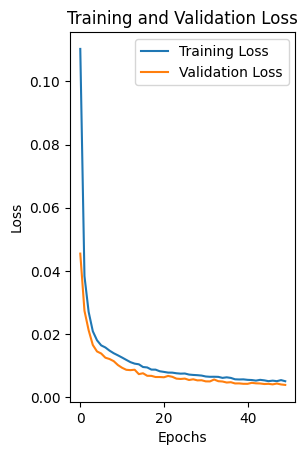

In [13]:
# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


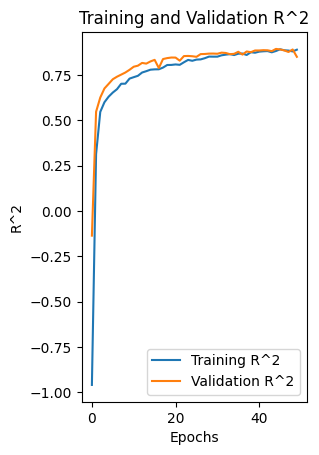

In [10]:
# Gráfico de R^2
plt.subplot(1, 2, 2)
plt.plot(history.history['coeff_determination'], label='Training R^2')
plt.plot(history.history['val_coeff_determination'], label='Validation R^2')
plt.title('Training and Validation R^2')
plt.xlabel('Epochs')
plt.ylabel('R^2')
plt.legend()

In [11]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

El entrenamiento del modelo se realizó durante 50 épocas, utilizando un conjunto de datos de entrenamiento y un conjunto de datos de validación para monitorear el rendimiento del modelo durante el proceso de entrenamiento. A continuación se presenta un análisis detallado del entrenamiento del modelo: